In [1]:

#import pandas
import pandas as pd
col_names = ['Category','Message','Emoji''Mathemtical symbols','URL','shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']
pima = pd.read_csv("spamfinal.csv")
pima.head()

,Unnamed: 0,Category,Message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


In [2]:
#split dataset in features and target variable
feature_cols = ['Emoji','Mathemtical symbols','URL','shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']
X = pima[feature_cols] # Features
y = pima.Category # Target variable

In [3]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [4]:
 # import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1435,   16],
       [  61,  160]], dtype=int64)

In [6]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

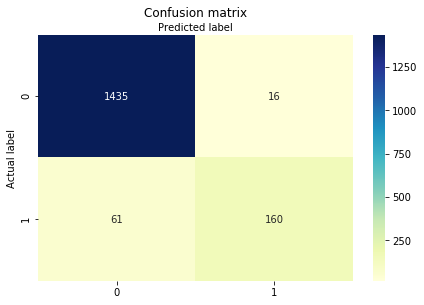

In [7]:
class_names=["ham","spam"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=2.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion.png',dbi='300') 

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred, average="macro"))
print("recall",recall_score(y_test, y_pred, average="macro"))


Accuracy: 0.9539473684210527
Precision 0.9341577540106951
recall 0.8564775112186633


In [9]:
from IPython.display import Markdown, display
display(Markdown("**Accuracy,Precision and Recall for different test Splits**"))

t=[0.5,0.4,0.3,0.2,0.1]
X = pima[feature_cols] # Features
y = pima.Category # Target variable
p=[]
r=[]
a=[]
for i in t:
    display(Markdown("**------------------------------------------------------------------------------------------**"))
    
    print(i)
    display(Markdown("**Test Size**"))
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,random_state=0)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    #
    y_pred=logreg.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    a.append(metrics.accuracy_score(y_test, y_pred))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    p.append(precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))


**Accuracy,Precision and Recall for different test Splits**

**------------------------------------------------------------------------------------------**

0.5


**Test Size**

Accuracy: 0.9544149318018664
Precision 0.9331089871897518
recall 0.8559288345660678


c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**------------------------------------------------------------------------------------------**

0.4


**Test Size**

Accuracy: 0.9564827276805743


c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision 0.9415838113996233
recall 0.8609950957127037


**------------------------------------------------------------------------------------------**

0.3


**Test Size**

Accuracy: 0.9539473684210527
Precision 0.9341577540106951


c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


recall 0.8564775112186633


**------------------------------------------------------------------------------------------**

0.2


**Test Size**

Accuracy: 0.9533632286995516
Precision 0.9425465838509317
recall 0.8609129581151832


c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**------------------------------------------------------------------------------------------**

0.1


**Test Size**

Accuracy: 0.9516129032258065
Precision 0.9362449799196787
recall 0.8519453519453519


c:\users\anviksha dixit\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**bar graph of precision and recall for different test-splits**

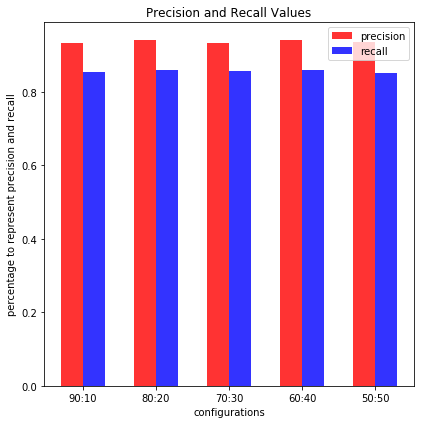

In [10]:
display(Markdown("**bar graph of precision and recall for different test-splits**"))
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
n_groups=5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='r',
                 label='precision')
 
rects2 = plt.bar(index + bar_width, r, bar_width,
                 alpha=opacity,
                 color='b',
                 label='recall')
 
plt.xlabel('configurations')
plt.ylabel('percentage to represent precision and recall')
plt.title('Precision and Recall Values')
plt.xticks(index+0.15, ('90:10','80:20','70:30','60:40','50:50'))
plt.legend()
plt.savefig('logisticbar1.png',dbi='300')
plt.tight_layout()
plt.show()

**ROC Curve for different test-split**

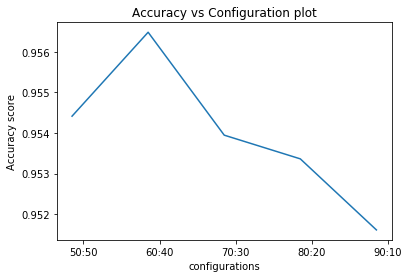

In [11]:
display(Markdown("**ROC Curve for different test-split**"))
    
import matplotlib.pyplot as plt
n_groups=5
index = np.arange(n_groups)
plt.plot(a)
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.savefig('logisticroc.png',dbi='300') 
plt.show()

In [12]:

display(Markdown("**Implementinig all the algorithms for the generating Accuracy Vs Configuration graph**"))

#Optimising the tree to depth 6
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from IPython.display import Markdown, display
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
display(Markdown("**Loadind the csv file of dataset into dataframe in Python program. and defing the column names and displaying dataset**"))
col_names = ['Category','Message','Emoji''Mathemtical symbols','URL','shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']
pima = pd.read_csv("spamfinal.csv")
pima
#**Adding feature column**"
feature_cols = ['Emoji','Mathemtical symbols','URL','shorthands','Dot','length','capitals','Special characters','word_count','mis_spell']
X = pima[feature_cols] # Features
y = pima.Category # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


display(Markdown("**Accuracy,Precision and Recall for different test Splits**"))

t=[0.5,0.4,0.3,0.2,0.1]
X = pima[feature_cols] # Features
y = pima.Category # Target variable
d1=[]
d2=[]
d3=[]
for i in t:
    display(Markdown("**------------------------------------------------------------------------------------------**"))
    
    print(i)
    display(Markdown("**Test Size**"))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=1)
    clf = DecisionTreeClassifier()
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    d1.append(metrics.accuracy_score(y_test, y_pred))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    d2.append(precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))
    d3.append(recall_score(y_test, y_pred, average="macro"))


**Implementinig all the algorithms for the generating Accuracy Vs Configuration graph**

**Loadind the csv file of dataset into dataframe in Python program. and defing the column names and displaying dataset**

**Accuracy,Precision and Recall for different test Splits**

**------------------------------------------------------------------------------------------**

0.5


**Test Size**

Accuracy: 0.9307250538406318
Precision 0.8580872058889942
recall 0.8446138367075968


**------------------------------------------------------------------------------------------**

0.4


**Test Size**

Accuracy: 0.9358456707043518
Precision 0.8650055622977346
recall 0.8660000202816445


**------------------------------------------------------------------------------------------**

0.3


**Test Size**

Accuracy: 0.937200956937799
Precision 0.8689800771306191
recall 0.8649249231140325


**------------------------------------------------------------------------------------------**

0.2


**Test Size**

Accuracy: 0.9345291479820628
Precision 0.8563857290589452
recall 0.8584394501602294


**------------------------------------------------------------------------------------------**

0.1


**Test Size**

Accuracy: 0.9301075268817204
Precision 0.8320867001528718
recall 0.8605405886014048


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
data = pd.read_csv("spamfinal.csv",encoding="ISO-8859-1")
data
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

gnb = GaussianNB()
used_features =[
    "Emoji",
    "Mathemtical symbols",
    "URL",
    "shorthands",
    "Dot",
    "length",
    "capitals",
    "Num_Phone",
    "Special characters",
    "word_count",
    "mis_spell"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Category"]
)
y_pred = gnb.predict(X_test[used_features])
train_set = X_train[used_features].values
labels = X_train["Category"]

test_set = X_test[used_features].values
y_test = X_test["Category"]

t=[0.5,0.4,0.3,0.2,0.1]
n1=[]
n2=[]
n3=[]
for i in t:
    X_train, X_test = train_test_split(data, test_size=i, random_state=int(time.time()))
    from sklearn.model_selection import train_test_split
    gnb = GaussianNB()
    used_features =[
        "Emoji",
        "Mathemtical symbols",
        "URL",
        "shorthands",
        "Dot",
        "length",
        "capitals",
        "Num_Phone",
        "Special characters",
        "word_count",
        "mis_spell"
    ]

# Train classifier
    gnb.fit(
        X_train[used_features].values,
        X_train["Category"]
    )
    y_pred = gnb.predict(X_test[used_features])
    train_set = X_train[used_features].values
    labels = X_train["Category"]

    test_set = X_test[used_features].values
    y_test = X_test["Category"]
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    n1.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))


Accuracy: 0.9213926776740847
Precision 0.8087086221430224
recall 0.9124862273100769
Accuracy: 0.9156572454015254
Precision 0.8030706972686847
recall 0.9164512250912302
Accuracy: 0.9252392344497608
Precision 0.8199926900584795
recall 0.9182057591442049
Accuracy: 0.9246636771300448
Precision 0.8269382195833067
recall 0.9129704301075269
Accuracy: 0.9372759856630825
Precision 0.8507169913419914
recall 0.91998541998542


In [14]:
import sklearn
import csv
import pandas as pd
from sklearn import datasets

#Load dataset
data= pd.read_csv("spamfinal.csv")
data.head()
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
svm1=[]
svm2=[]
svm3=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Gaussian Classifier
    clf=svm.SVC(kernel='linear')

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    svm1.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))     
    

Accuracy: 0.9522613065326633
Precision 0.9299723070851675
recall 0.8534578038303204
Accuracy: 0.946164199192463
Precision 0.9404690618762475
recall 0.8294148380355277
Accuracy: 0.9479665071770335
Precision 0.9186043875063772
recall 0.8441099720410066
Accuracy: 0.9551569506726457
Precision 0.9416025446323109
recall 0.8595703608034954
Accuracy: 0.946236559139785
Precision 0.8910546467107553
recall 0.8242424242424242


In [15]:
import pandas as pd
data=pd.read_csv('spamfinal.csv')
data.head()
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
p=[]
r=[]
rf=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    rf.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))     
    

Accuracy: 0.9662598707824839
Precision 0.9421679850441793
recall 0.9070730922451964
Accuracy: 0.9699416778824586
Precision 0.9570405112874961
recall 0.9114113830302739
Accuracy: 0.9665071770334929
Precision 0.9458149432534678
recall 0.9093228004583007
Accuracy: 0.967713004484305
Precision 0.9521756219365578
recall 0.9053367875647669
Accuracy: 0.9767025089605734
Precision 0.9736696230598669
recall 0.9245962732919255


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
data = pd.read_csv('spamfinal.csv', encoding='latin-1')
data.head(n=10)
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test 
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
p=[]
r=[]
adda=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Gaussian Classifier
    clf=AdaBoostClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    adda.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))  


Accuracy: 0.9641062455132807
Precision 0.9401783895276017
recall 0.9020538585961354
Accuracy: 0.968147151188874
Precision 0.9498150747287762
recall 0.9098159668221877
Accuracy: 0.9671052631578947
Precision 0.9383520872862066
recall 0.9121133496133496
Accuracy: 0.9650224215246637
Precision 0.9283427223265444
recall 0.9034580498866214
Accuracy: 0.9659498207885304
Precision 0.9314516129032258
recall 0.9033194516217284


**ROC Curve for different test-split of All the algorithms**

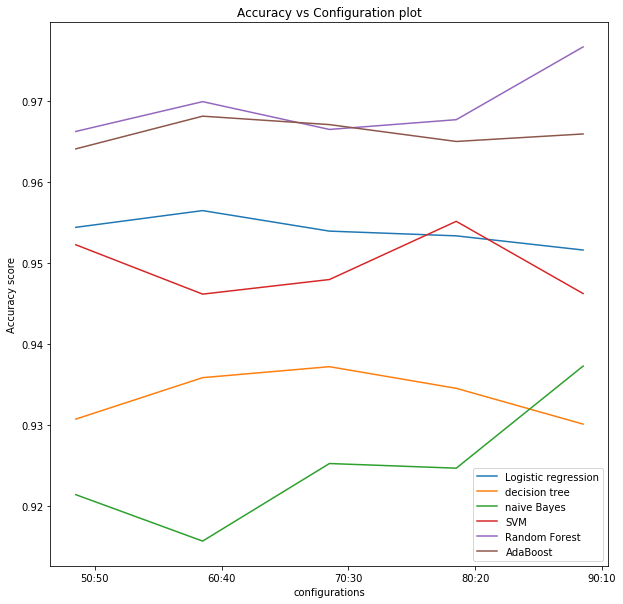

In [17]:
display(Markdown("**ROC Curve for different test-split of All the algorithms**"))
import numpy as np   
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
n_groups=5
index = np.arange(n_groups)
plt.plot(a,label="Logistic regression")
plt.plot(d1,label="decision tree")
plt.plot(n1,label="naive Bayes")
plt.plot(svm1,label="SVM")
plt.plot(rf,label="Random Forest")
plt.plot(adda,label="AdaBoost")
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.legend()
plt.savefig('ROCf.png',dpi=1000)
plt.show()
